In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci

In [2]:
N = 100
sphere = np.array([np.array([[np.cos(s)*np.sin(t)], [np.sin(s)*np.sin(t)], [np.cos(t)]]) for s in np.linspace(0, 2*np.pi, 10) for t in np.linspace(0, np.pi, 10)])

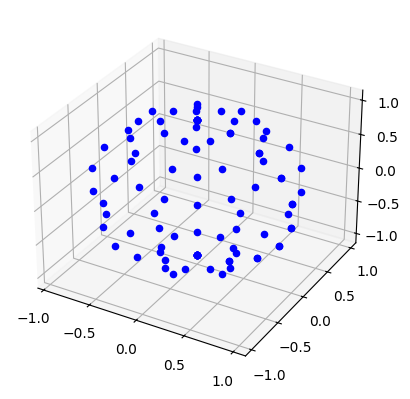

In [3]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for x, y, z in sphere:
    ax.scatter(x, y, z, c='b')
plt.show()

Zad 1

In [14]:
A1 = np.array([[1, 2, 3],
               [4, 5, 6],
               [7, 8, 9]])
A2 = np.array([[5, 7, 3],
               [6, 9, 3],
               [2, 0, 4]])
A3 = np.array([[1, 4, 9],
               [1, 4, 7],
               [1, 3, 4]])
points_1 = np.apply_along_axis(lambda x: np.dot(A1, x), 1, sphere)
points_2 = np.apply_along_axis(lambda x: np.dot(A2, x), 1, sphere)
points_3 = np.apply_along_axis(lambda x: np.dot(A3, x), 1, sphere)

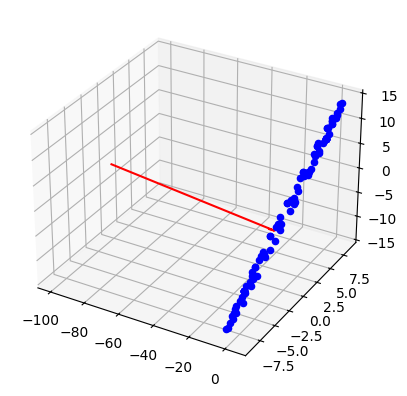

In [31]:
U1, S1, V1 = np.linalg.svd(A1)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for x, y, z in points_1:
    ax.scatter(x, y, z, c='b')
ax.plot(S1[0]*U1[0, :], S1[1]*U1[1, :], S1[2]*U1[2, :], c='r')
plt.show()

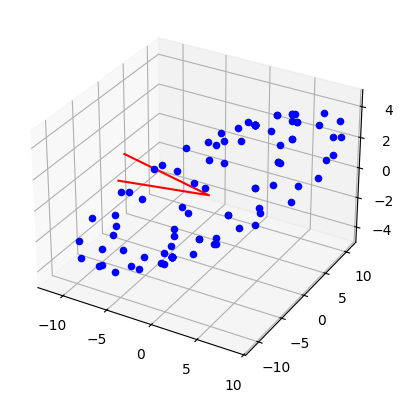

In [25]:
U1, S1, V1 = np.linalg.svd(A2)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for x, y, z in points_2:
    ax.scatter(x, y, z, c='b')
ax.plot(S1[0]*U1[0, :], S1[1]*U1[1, :], S1[2]*U1[2, :], c='r')
plt.show()

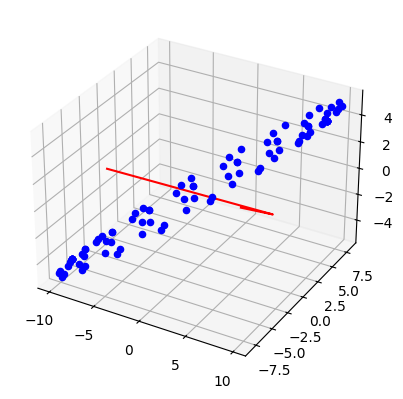

In [26]:
U1, S1, V1 = np.linalg.svd(A3)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for x, y, z in points_3:
    ax.scatter(x, y, z, c='b')
ax.plot(S1[0]*U1[0, :], S1[1]*U1[1, :], S1[2]*U1[2, :], c='r')
plt.show()

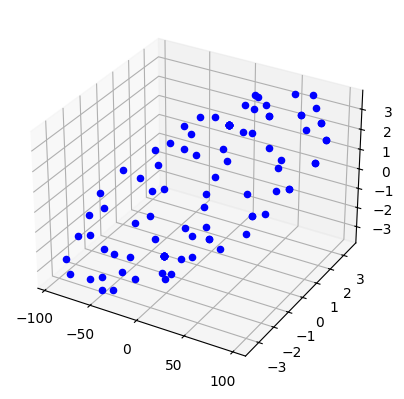

In [27]:
A_max = A1 = np.array([[100, 2, 2],
                        [2, 2, 2],
                        [2, 2, 2]])
points = np.apply_along_axis(lambda x: np.dot(A_max, x), 1, sphere)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for x, y, z in points:
    ax.scatter(x, y, z, c='b')
plt.show()

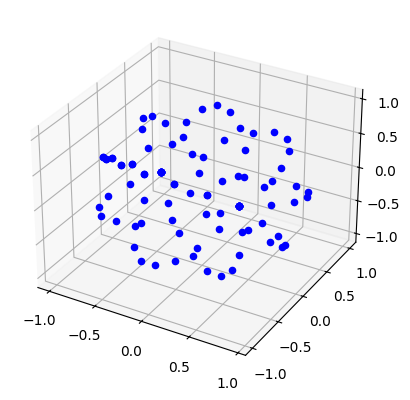

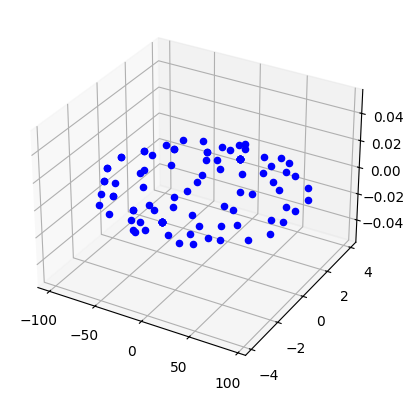

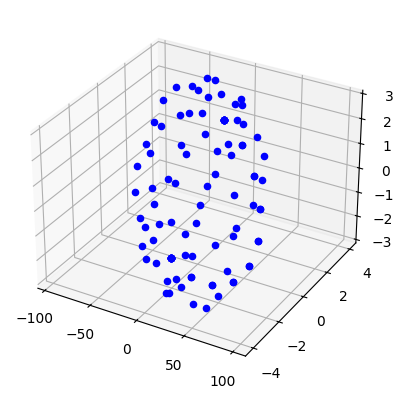

In [28]:
U, S, V = np.linalg.svd(A_max)
points = np.apply_along_axis(lambda x: np.dot(V, x), 1, sphere)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for x, y, z in points:
    ax.scatter(x, y, z, c='b')
plt.show()
points = np.apply_along_axis(lambda x: np.dot(np.diag(S), x), 1, points)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for x, y, z in points:
    ax.scatter(x, y, z, c='b')
plt.show()
points = np.apply_along_axis(lambda x: np.dot(V, x), 1, points)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for x, y, z in points:
    ax.scatter(x, y, z, c='b')
plt.show()

Zad 2

C:\Users\franc\AppData\Local\Temp\ipykernel_20840\1966473845.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imread("test_image.png")


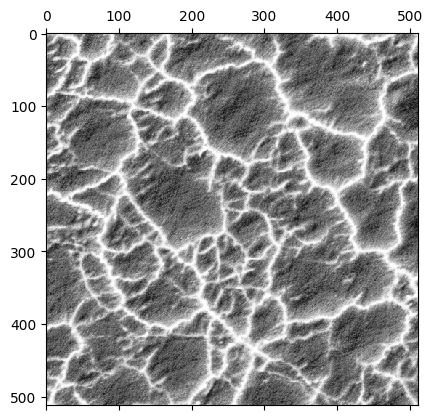

In [6]:
from imageio import imread
image = imread("test_image.png")
n = image.shape
gray = np.zeros((512, 512))
for i in range(512):
    for j in range(512):
        gray[i, j] = 0.3*image[i, j, 0] + 0.59*image[i, j, 1] + 0.11*image[i, j, 2]
plt.matshow(gray, 1, cmap="Greys")
plt.show()

In [7]:
U, S, Vh = np.linalg.svd(gray)
print(U.shape, S.shape, Vh.shape)

(512, 512) (512,) (512, 512)


In [11]:
def reconstruct(image: np.ndarray,U: np.ndarray, S: np.ndarray, Vh: np.ndarray):
    n = U.shape[0]
    reconstruc = np.zeros((n, n))
    values = []
    for i in range(n):
        reconstruc += S[i]*(np.outer(U[:, i], Vh[i, :]))
        values.append(np.linalg.norm(reconstruc-image))
        if i%100 == 0:
            plt.matshow(reconstruc, 1, cmap="Greys")
            plt.show()
    plt.matshow(reconstruc, 1, cmap="Greys")
    plt.show()
    plt.plot(values)
    plt.show()


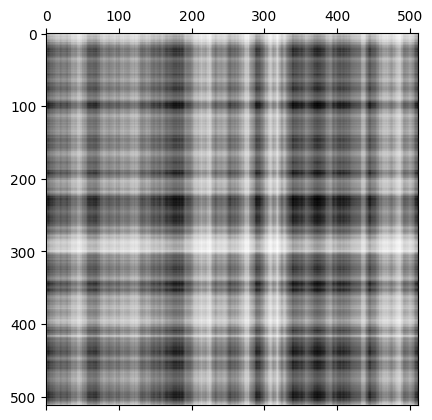

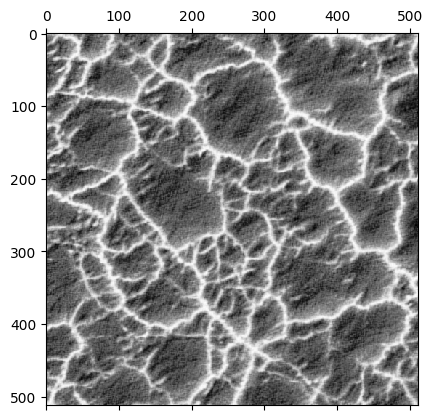

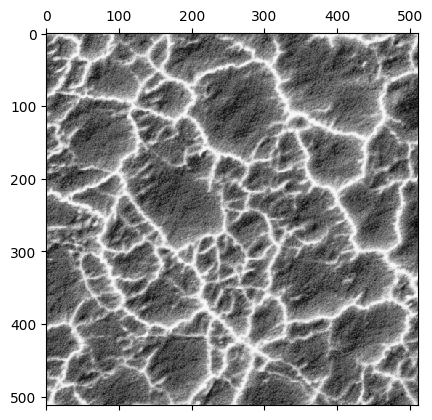

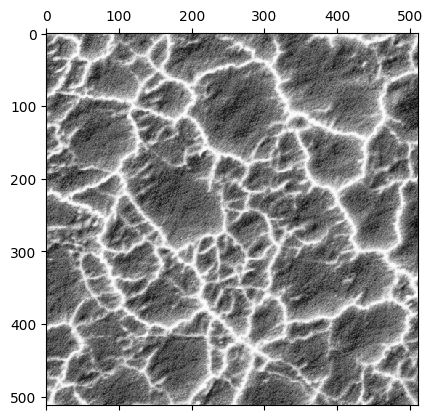

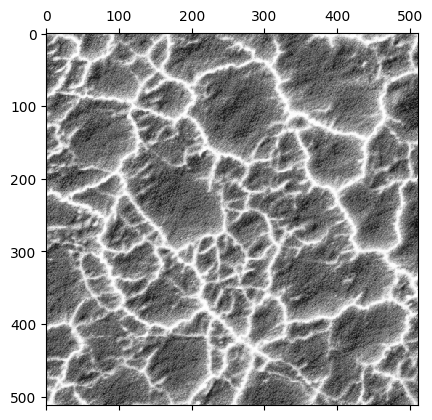

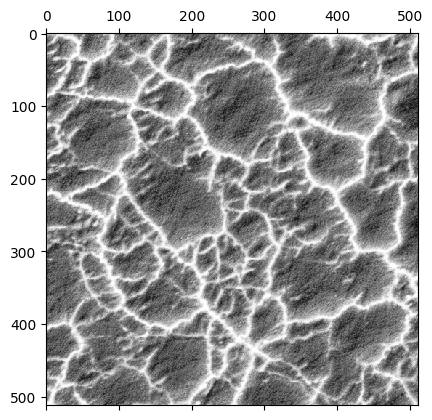

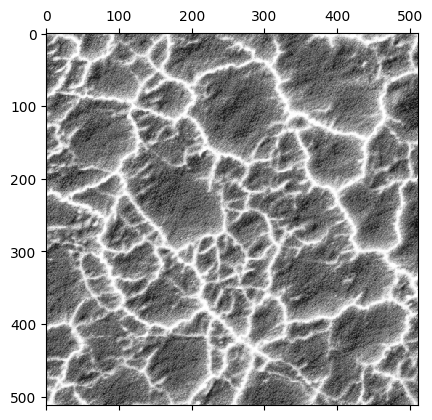

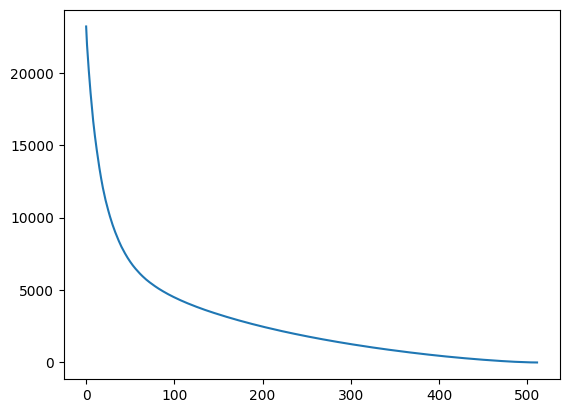

In [12]:
reconstruct(gray, U, S, Vh)